In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


Now we are going to predict using them all

In [6]:
df.corrwith(df['CO2EMISSIONS'])

ENGINESIZE              0.874154
CYLINDERS               0.849685
FUELCONSUMPTION_COMB    0.892129
CO2EMISSIONS            1.000000
dtype: float64

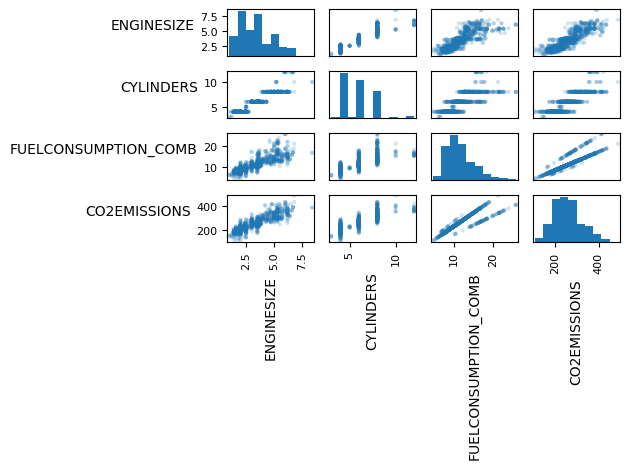

In [7]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.show()

### Normalization

In [8]:
for col in df:
    df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])
df.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_17816\1150630520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1.067000e+03,1.067000e+03,1.067000e+03,1.067000e+03
mean,2.663703e-17,-9.322960e-17,3.995554e-17,-3.196443e-16
std,1.000469e+00,1.000469e+00,1.000469e+00,1.000469e+00
min,-1.657890e+00,-1.555574e+00,-1.975017e+00,-2.340110e+00
25%,-9.512918e-01,-9.989685e-01,-7.407893e-01,-7.771812e-01
50%,3.794572e-02,1.142424e-01,-1.954330e-01,-8.254600e-02
75%,6.738841e-01,1.227453e+00,5.077895e-01,5.963020e-01
max,3.570937e+00,3.453875e+00,4.081308e+00,3.659012e+00


Split data randomly into test and train datasets

In [9]:
df.sample(frac= 1, random_state= 42).reset_index(drop = True) # Shuffle the data

X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].to_numpy() # Features
X_train, X_test = X[ : int(len(X) * 0.8)], X[int(len(X) * 0.8) : ]

Y = df['CO2EMISSIONS'].to_numpy() # Label
Y_train, Y_test = Y[ : int(len(Y) * 0.8)], Y[int(len(Y) * 0.8) : ]


In [10]:
print("X train shape: ", X_train.shape, "\nY train shape: ", Y_train.shape)

X train shape:  (853, 3) 
Y train shape:  (853,)


In [11]:
def train_multiple_lr(X, Y, lr=0.1, epochs=1000):
    n_features = X.shape[1]
    W = np.zeros(n_features)
    b = 0.0

    for epoch in range(epochs):
        Y_pred = np.dot(X, W) + b
        error = Y - Y_pred

        dW = -2 * np.dot(X.T, error) / len(X)     
        db = -2 * np.mean(error)

        W -= lr * dW
        b -= lr * db

        loss = np.mean(error ** 2)
        if loss < 0.001:
            break
    print(f"loss={loss:.4f}")
    return W, b


W, b = train_multiple_lr(X_train, Y_train)

loss=0.1484


In [12]:
Y_pred = W * X_test + b

Calculate RMSE(Root Mean Squared Error)
The RMSE is a commonly used metric to measure the difference between values predicted by a model and the actual values.

The formula for RMSE is:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

Where:
- \( y_i \) = actual value
- \( hat{y}_i \) = predicted value
- \( n \) = number of observations

*If your RMSE on training is low but high on test → overfitting.*<br>
*If RMSE is high on both → underfitting or bad features.*

In [21]:
rmse = np.sqrt(np.mean(((Y_test - np.mean(Y_pred)) ** 2 )/ Y_test.shape[0]))
rmse

np.float64(0.06420273964216519)

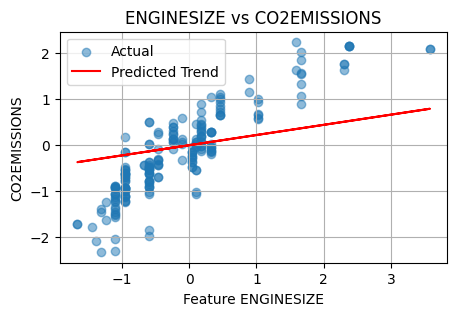

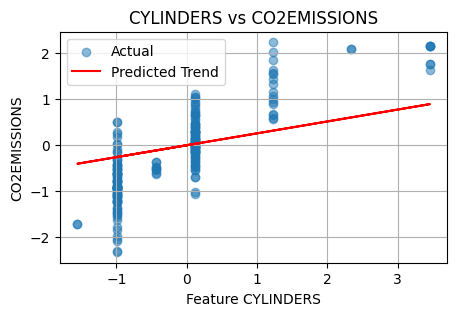

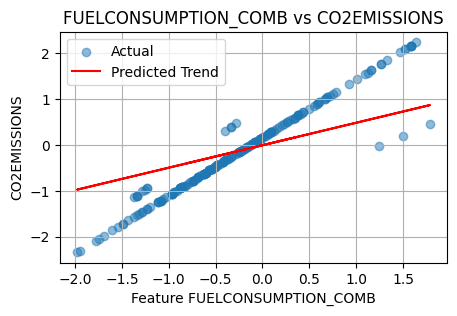

In [ ]:
feature_names = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']

for i in range(X_test.shape[1]):
    plt.figure(figsize=(5, 3))
    plt.scatter(X_test[:, i], Y_test, alpha=0.5, label="Actual")

    x_vals = X_test[:, i]
    y_vals = x_vals * W[i] + b  
    
    plt.plot(x_vals, y_vals, color='red', label="Predicted Trend")

    plt.xlabel(f"Feature {feature_names[i]}")
    plt.ylabel("CO2EMISSIONS")
    plt.title(f"{feature_names[i]} vs CO2EMISSIONS")
    plt.legend()
    plt.grid(True)
    plt.show()
